# An Analysis of Paleo to present Climate Change Data

<details>

<summary> Student Details </summary>

| Student| Details |
| -------- | -------- |
| Course: | KDATG_L08_Y1 |
| Author: | Rebecca Hannah Quinn |
| Student Number: | G00425671 |

</details>

---

## Project Goals

To Analyse CO2 vs Temperature Anomaly for the past 800,000 years to the present day.
To examine the change in the polar-ice coverage alongside this.
To examine the changes in Ireland and Irish climate change signals.

In gathering this information and data I will fuse and analyse the data using pandas dataframes and export the results to csv and json formats.

I will be anaylising the data, the trends, the relationships between them including but not limited to: temporal leads, lags, and frequencies. I will also use synthesised data to predict global temperature anomoly over the next few decades and compare to published models of the same to see if atmospherice CO2 trends continue and comment on the accelerated warming based on the latest features with temperatures polar-ice coverage and ocean and sea levels.




<details>

<summary> Table of Contents </summary>

[INTRODUCTION](#01)

[PRE-PROCESSING](#02)

[ANALYSIS](#03)

[PREDICITONS](#04)

[FURTHER COMMENT](#05)

[PLOTS](#06)

</details>

---


## Introduction


There have been studies on the Earth"s climate that have resulted in data as far back as 800,000 years by extracting core samples from deep beneath the ice sheets of Greenland and Antarctica. These samples contain detailed information on air temperature and CO2 levels that are trapped within them. Current polar records demonstrate a close association between atmospheric carbon dioxide and temperature in the natural world. In essence, when one increases, the other one follows.

However, there is still some uncertainty about which occurred first - a spike in temperature or CO2. Until now, the most extensive records to date on a significant change in Earth"s climate came from the EPICA Dome C ice core on the Antarctic Plateau. The data, which covered the end of the last ice age, between 20,000 and 10,000 years ago, indicated that CO2 levels could have lagged behind rising global temperatures by as much as 1,400 years.
[1]: https://www.scientificamerican.com/article/ice-core-data-help-solve/#:~:text=Scientists%20use%20air%20trapped%20in,than%20the%20ice%20surrounding%20them.


<a id="01i">

## Pre-processing

</a>





### Import Packages

In [974]:
#importing packages required for analysis and visualization
import requests
from io import StringIO
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Adjustments

#### C02 Levels Data

##### Data Collection and Reading in the Data

The first database used `epica8kyr1`  is an updated version of the atmospheric CO2 composite data obtained from the revised EPICA Dome C and Antarctic ice cores. The previous version of Luthi et al. (2008) contained analytical bias and lower quality data, which has been improved in this new version. The age unit is in years before present (yr BP), where present refers to 1950 AD. This has been changed later from negetive integers to the actual year, starting with year 0, in order to merge and clear the data up for use in later plots.

In [975]:
epica1col = ["year", "co2", "sigma"]
epica8kyr1 = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite", skiprows=59, names=epica1col)
epica8kyr1["year"] = epica8kyr1["year"].astype(int)
epica8kyr1["year"] = -1 * epica8kyr1["year"] + 1950
epica8kyr1 = epica8kyr1.sort_values(by="year", ascending=False)
epica8kyr1.to_csv("epica8kyr1.csv", index=False)

In [976]:
epica2col = ["year", "co2", "unc"]
epica8kyr2 = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv", skiprows=44, sep=",", names=epica2col)

##### Mauna Lon Observeratory, 1960 to Present.

Additional CO2 Data

In [977]:
epica3col = ["year", "co2", "unc"]
url3 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
response = requests.get(url3)
if response.status_code == 200:
    text = response.text
    epica8kyr3 = pd.read_fwf(StringIO(text), names=epica3col, skiprows=45, header=0)
    epica8kyr3 = epica8kyr3.sort_values(by="year", ascending=False)  # Corrected
    epica8kyr3.to_csv("epica8kyr3.csv", index=False)

In [978]:
epica8kyr3.columns
epica8kyr3.head()

,year,co2,unc
NaN,2023,1921.88,0.62
NaN,2022,1910.97,0.78
NaN,2021,1895.11,0.55
NaN,2020,1879.45,0.56
NaN,2019,1866.84,0.60


##### Cleanup of Data

Here we take the "year" column in the second dataset and convert the data to actual dates (stored in a new column titled "date") and put in order and make clearer so when we merge the datasets we can do so seamlessly.

In [979]:
epica8kyr2["year"] = epica8kyr2["year"].astype(int)
epica8kyr2 = epica8kyr2.sort_values(by="year", ascending=False)  # Corrected
epica8kyr2.to_csv("epica8kyr2.csv", index=False)

##### Merging Data

###### Merging both C02 datasets for plotting

In [980]:
epica8kyr1.columns
epica8kyr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1856 entries, 0 to 1855
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1856 non-null   int64  
 1   co2     1856 non-null   float64
 2   sigma   1856 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.0 KB


In [981]:
epica8kyr2.columns
epica8kyr2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 64 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    65 non-null     int64  
 1   co2     65 non-null     float64
 2   unc     65 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [982]:
epica8kyr3.columns
epica8kyr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, nan to nan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   co2     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [983]:
#final merge
mergeddata = pd.merge(epica8kyr3, epica8kyr2, on=["year", "co2", "unc"], how="outer")
mergeddata = pd.merge(mergeddata, epica8kyr1, on=["year", "co2"], how="outer")

mergeddata.to_csv("mergedco2data.csv", index=False)
mergeddata.columns

Index(['year', 'co2', 'unc', 'sigma'], dtype='object')

#### Calculating Statistical Measures


In [984]:
mean_value = mergeddata["co2"].mean()
print(mean_value)

median_value = mergeddata["co2"].median()
print(median_value)

std_deviation = mergeddata["co2"].std()
print(std_deviation)

correlation = mergeddata["co2"].corr(mergeddata["year"])
print(correlation)


268.889868551032
233.9
221.7958485308088
0.16570946843235793



#### Initial Visualization


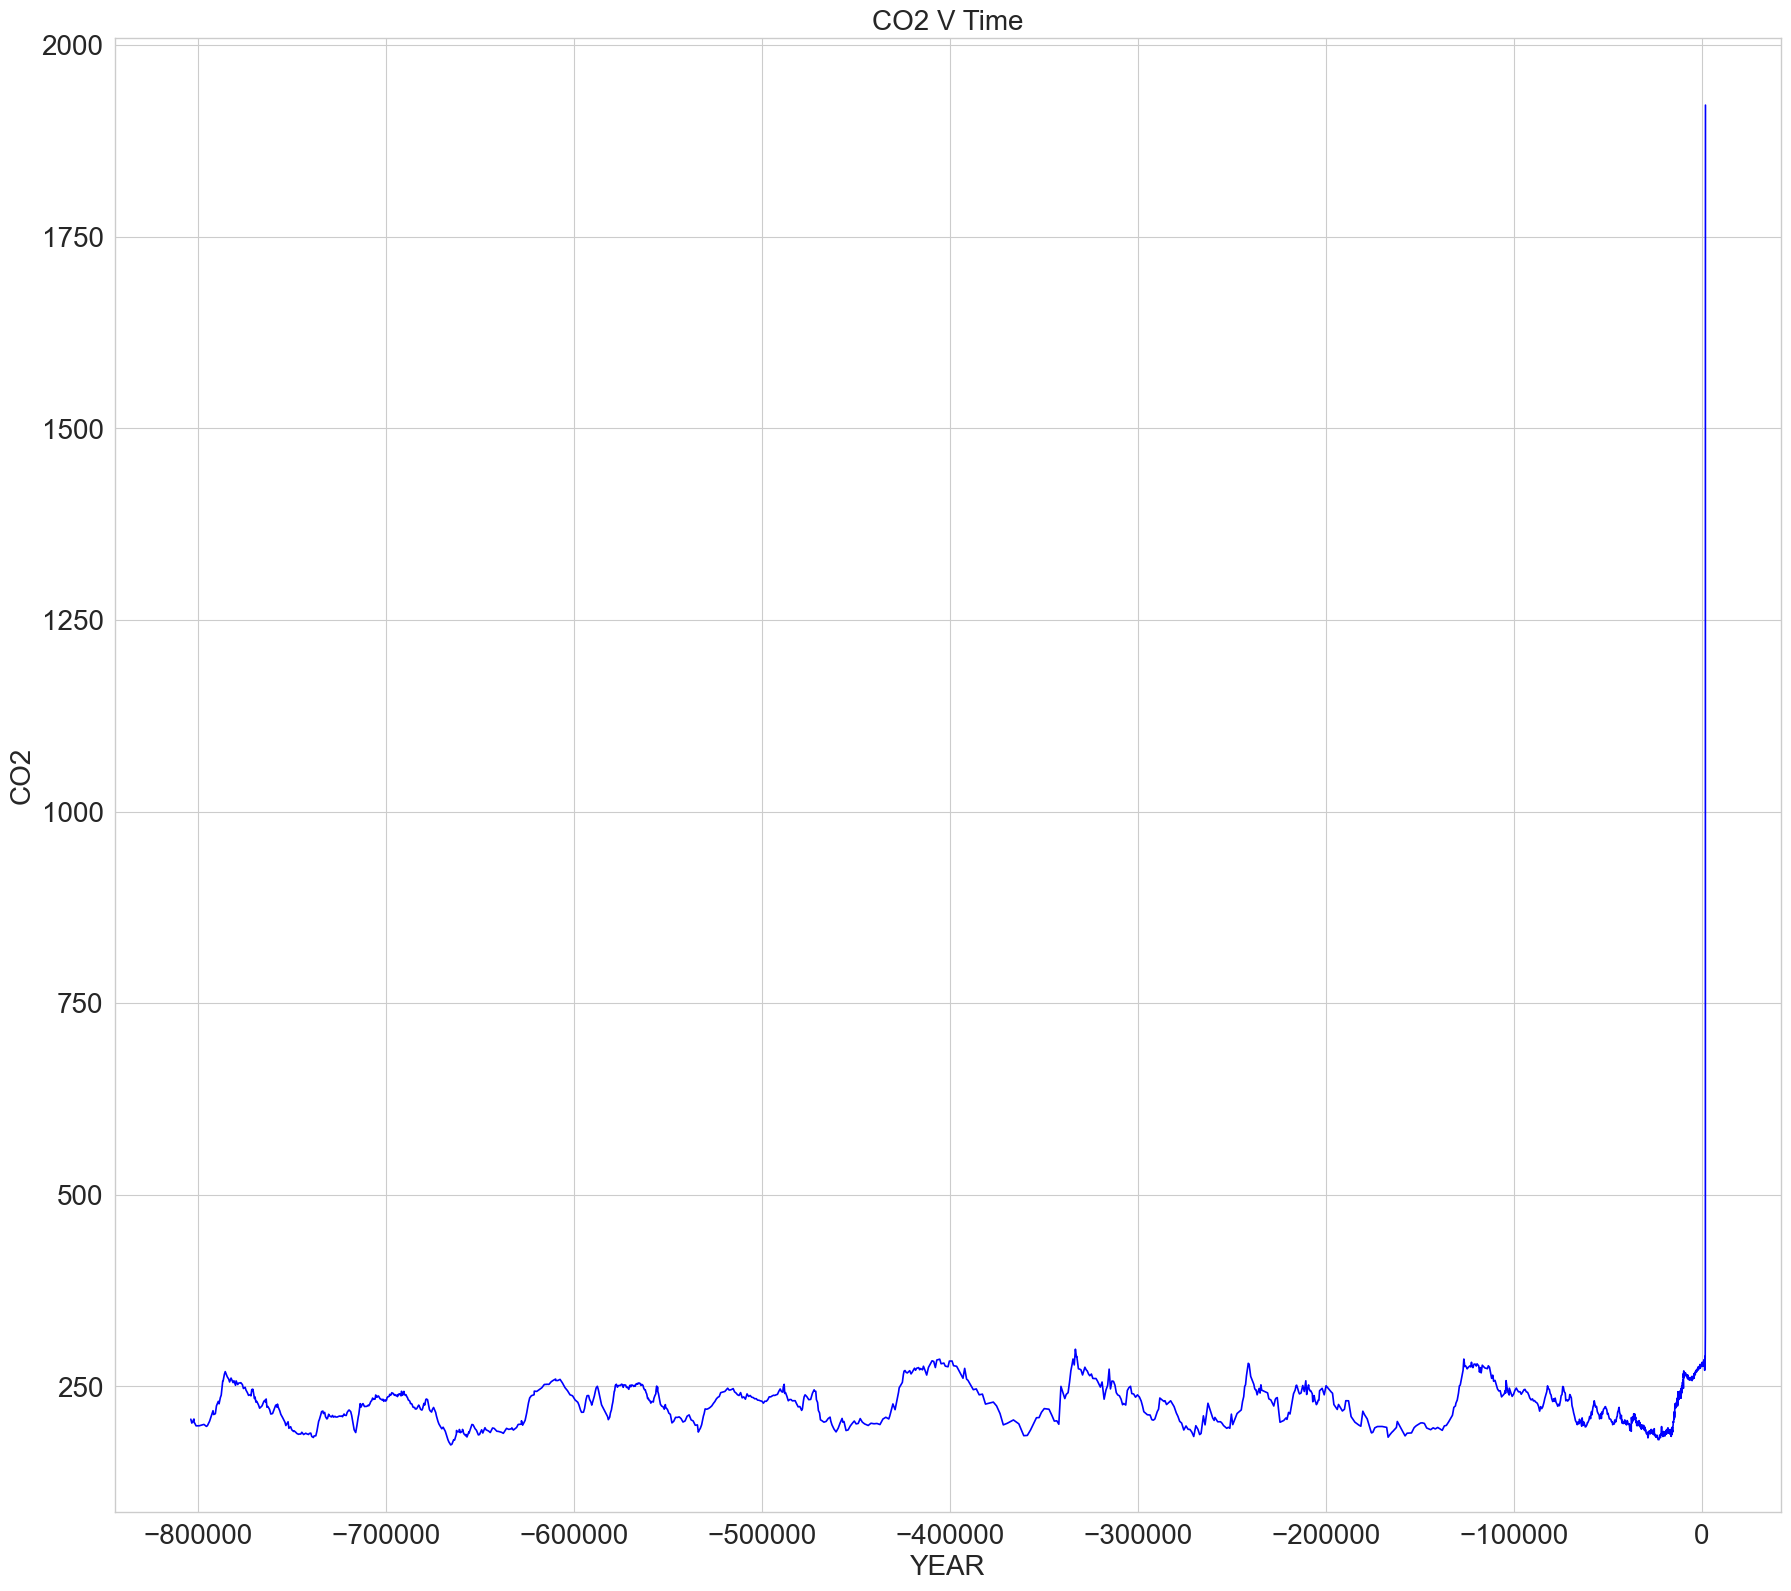

In [985]:
#Matplotlib Line plot
plt.figure(figsize=(18, 16))
plt.plot(mergeddata["year"], mergeddata["co2"], color="blue")
plt.xlabel("YEAR", fontsize=20)
plt.ylabel("CO2", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CO2 V Time", fontsize=20)
plt.tight_layout()
plt.savefig("lineplot1.png")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

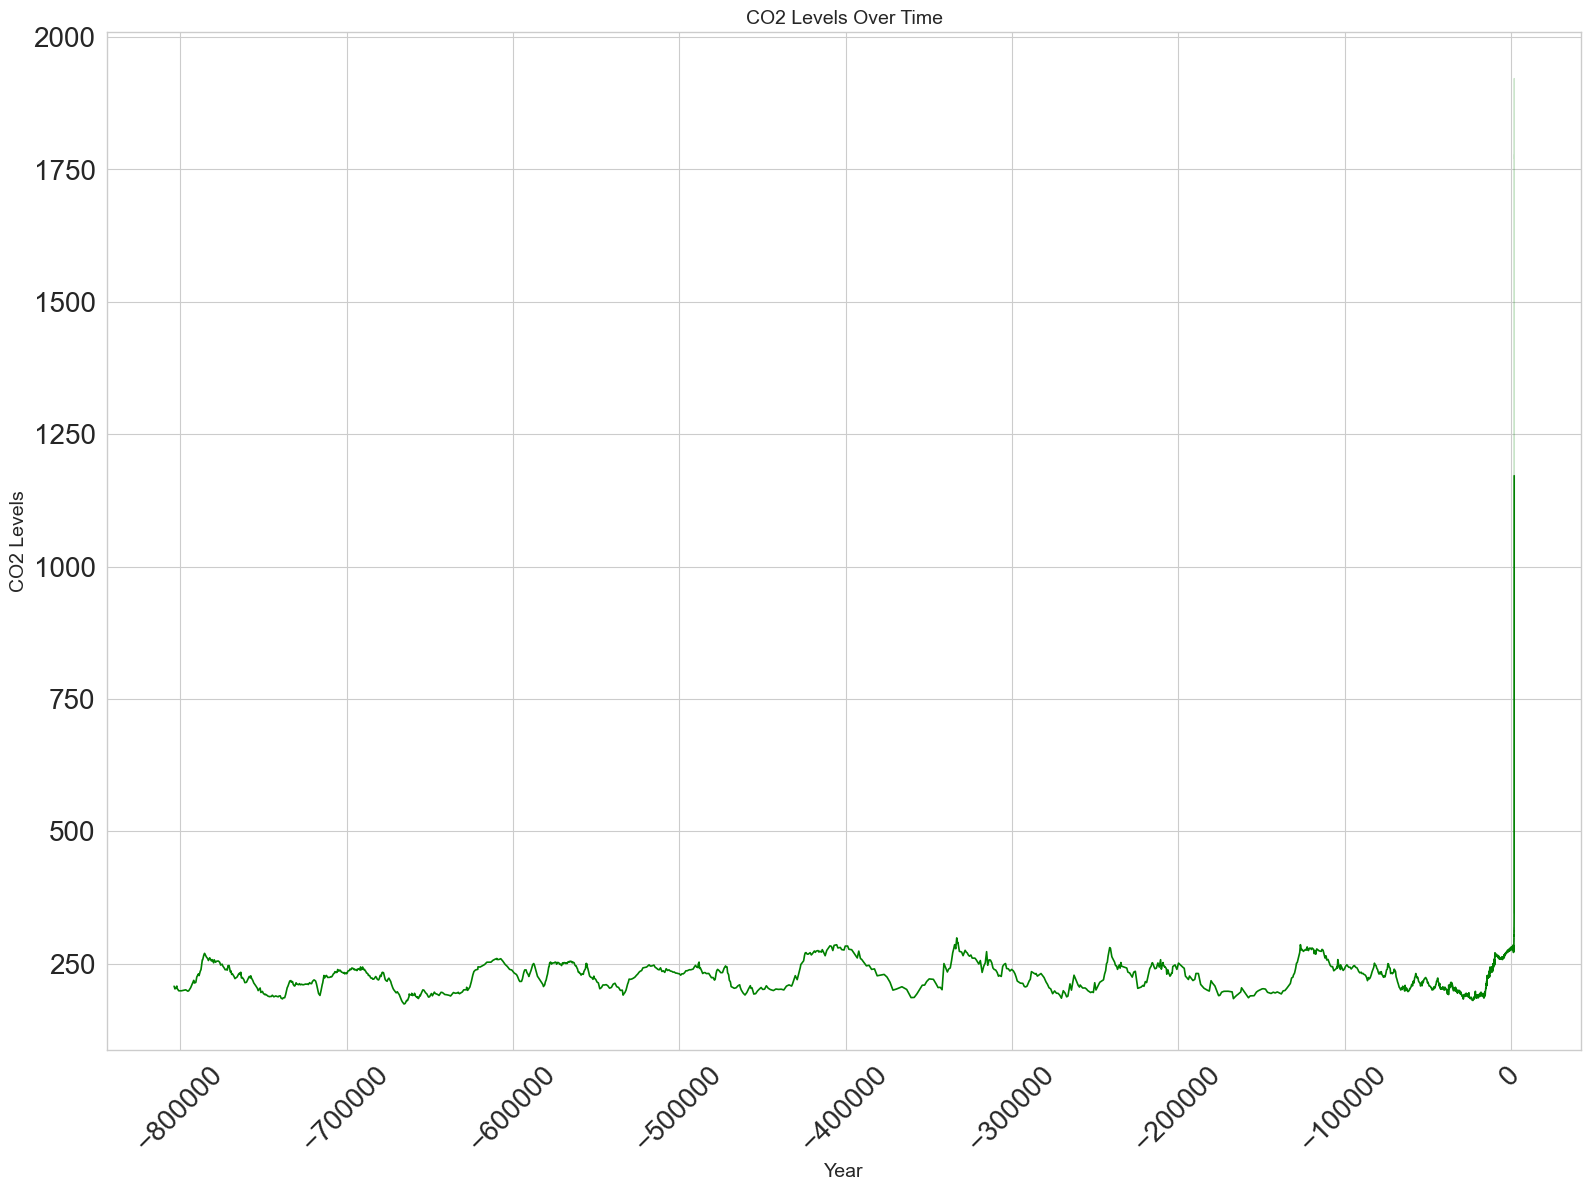

In [986]:
#SNS Lineplot
#style
sns.set_style("whitegrid")
sns.set_context("paper")  # Adjust context to paper for smaller font sizes

#size
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergeddata, x="year", y="co2", color="green")

#labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Levels", fontsize=14)
plt.title("CO2 Levels Over Time", fontsize=14)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()  #additional spacing
plt.savefig("snslineplotnew.png")

#### Collection of CH4 Data

In [987]:
colnames = ["year", "ch4", "unc"]
noaach4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"

response = requests.get(noaach4)

if response.status_code == 200:
    text = response.text
    noaach4df = pd.read_fwf(StringIO(response.text), names=colnames, widths=[6, 12, 8], skiprows=44, header=0)
    noaach4sort = noaach4df.sort_index(ascending=False)
    noaach4sort.to_csv("noaach4new.csv", index=False)
    
noaach4sort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 39 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   ch4     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [1010]:
ch4names = ["year", "ch4"]
ch4data = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", usecols=[0, 1], skiprows=7, header=0, names=ch4names)
ch4data["year"] = pd.to_numeric(ch4data["year"], errors='coerce')
ch4data = ch4data.dropna(subset=["year"])
ch4data["year"] = ch4data["year"].astype(int)
ch4data.to_csv("ch4data.csv")
ch4data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2207 entries, 0 to 2207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2207 non-null   int64  
 1   ch4     2103 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 51.7 KB


In [1014]:
mergech4 = pd.merge(ch4data, noaach4sort, on=["year", "ch4"], how="outer")
mergech4.to_csv("mergedch4.csv", index=False)


---


In [ ]:
noaach4sort.head()

In [ ]:
noaach4sort.info()

In [ ]:
noaach4sort.describe()

##### CH4 Plots

In [ ]:
noaach4sort.columns

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

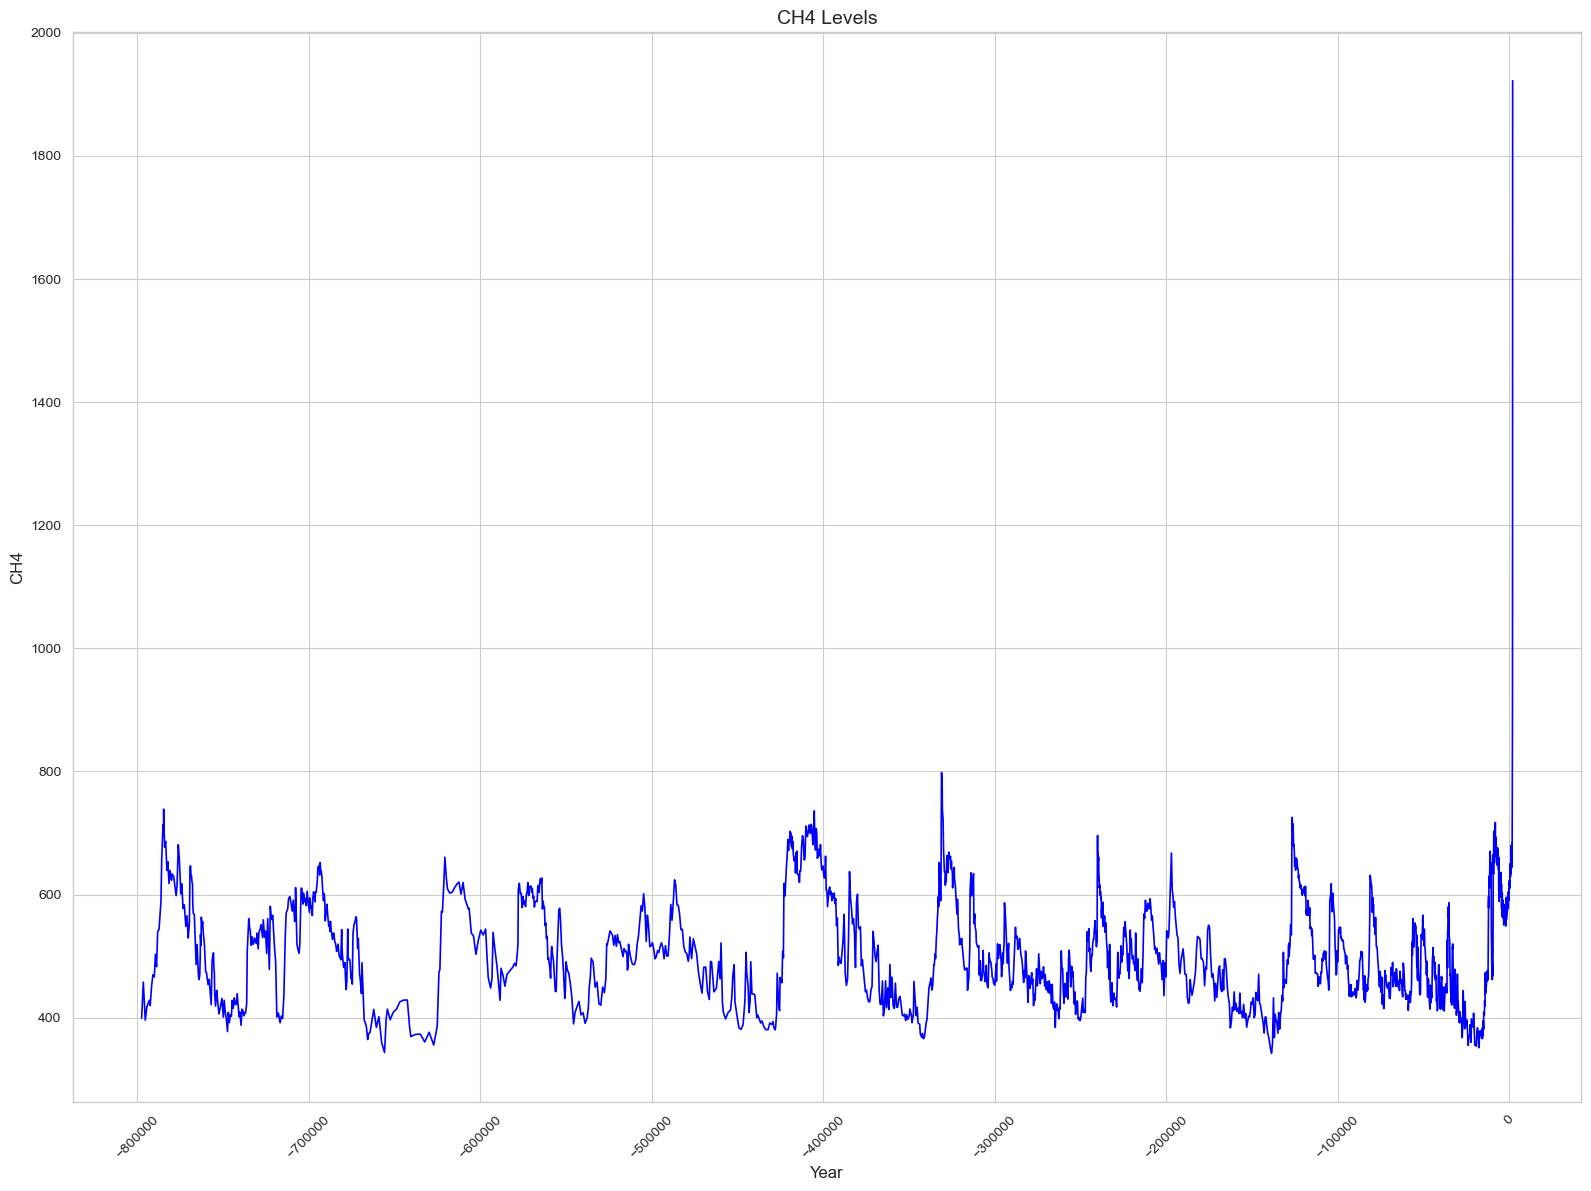

In [1015]:
#SNS Lineplot
#style
sns.set_style("whitegrid")
sns.set_context("paper")  # Adjust context to paper for smaller font sizes

#size
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

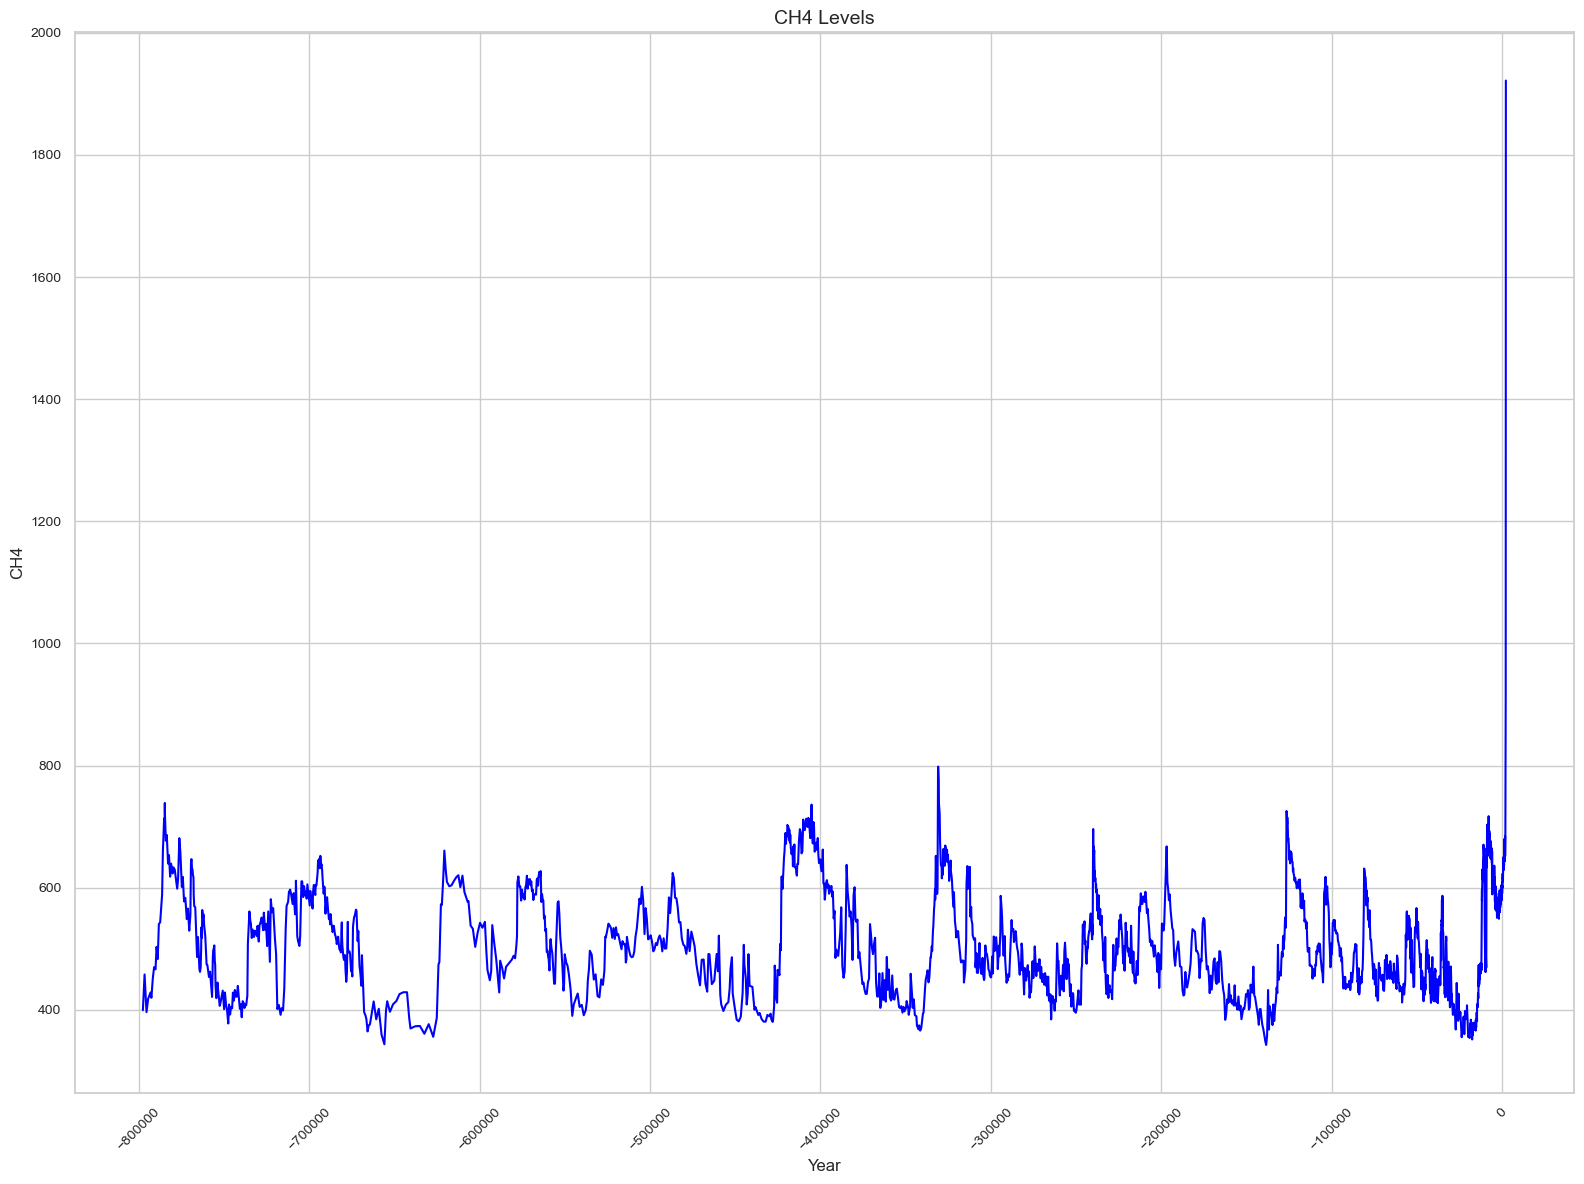

In [1019]:
plt.figure(figsize=(16, 12))
#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

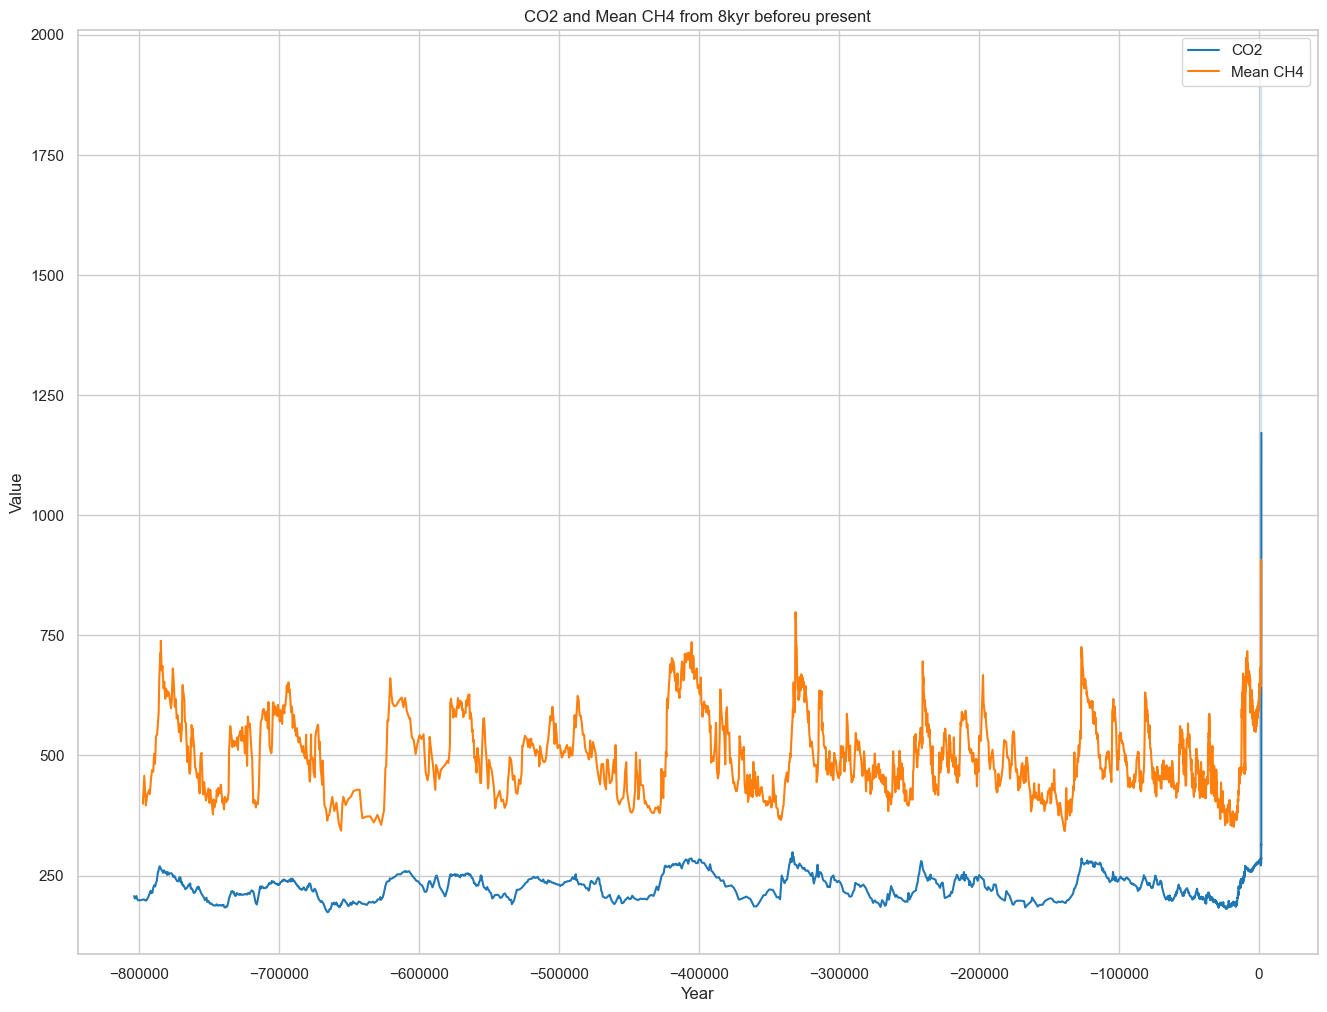

In [1021]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")
sns.lineplot(data=ch4data, x="year", y="ch4", label="Mean CH4")

plt.title("CO2 and Mean CH4 from 8kyr before present")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()


---


#### Temperatures

-54.5deg celcius is the average temperature of the last 1000 years. To calculate what the average temp is for each year in the below data sets we have to caluclate using the temp columns(originally name anomoly)

In [1046]:
epicadeut = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"

response = requests.get(epicadeut)

if response.status_code == 200:
    text = response.text
    epicadeutdf = pd.read_csv(StringIO(text), sep='\s+', skiprows=89, header=0)
    epicadeutdf.rename(columns={"Age": "year"}, inplace=True)
    epicadeutdf.rename(columns={"Temperature": "temp"}, inplace=True)
    epicadeutdf["year"] = epicadeutdf["year"].astype(int)
    epicadeutdf["year"] = -1 * epicadeutdf["year"] + 1950
    epicadeutdf["temp"] = epicadeutdf["temp"] + (-54.5)
    
    epicacols = epicadeutdf.iloc[:, [2, 4]]

epicacols.to_csv("epicadeut.csv", index=False)


In [ ]:
epicacols.head(15)

In [ ]:
epicacols.info()

 EDC3 age scale (years before year 1950)
 Temperature estimate (temperature difference from the average of the last 1000 years)


---


In [1050]:
noaanames=["year", "temp"]
noaatemp = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows=5, names=noaanames, header=0)
noaatemp["temp"] = pd.to_numeric(noaatemp["temp"], errors="coerce")
noaatemp["temp"] = noaatemp["temp"] + (-54.5)
noaasort = noaatemp.sort_values(by="year", ascending=False)
noaasort.to_csv("noaatemp.csv", index=False)


In [1051]:
noaasort.head(10)

,year,temp
171,2023,-54.27
170,2022,-54.13
169,2021,-54.41
168,2020,-54.03
167,2019,-54.21
166,2018,-54.17
165,2017,-54.19
164,2016,-54.41
163,2015,-54.66
162,2014,-54.36


In [1057]:
mergetemp = pd.merge(noaasort, epicacols, on=["year", "temp"], how="outer")
mergetemp.to_csv("tempsmerge.csv", index=False)

mergetemp.head()
mergetemp.shape

(5971, 2)

##### Temperature Plots

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

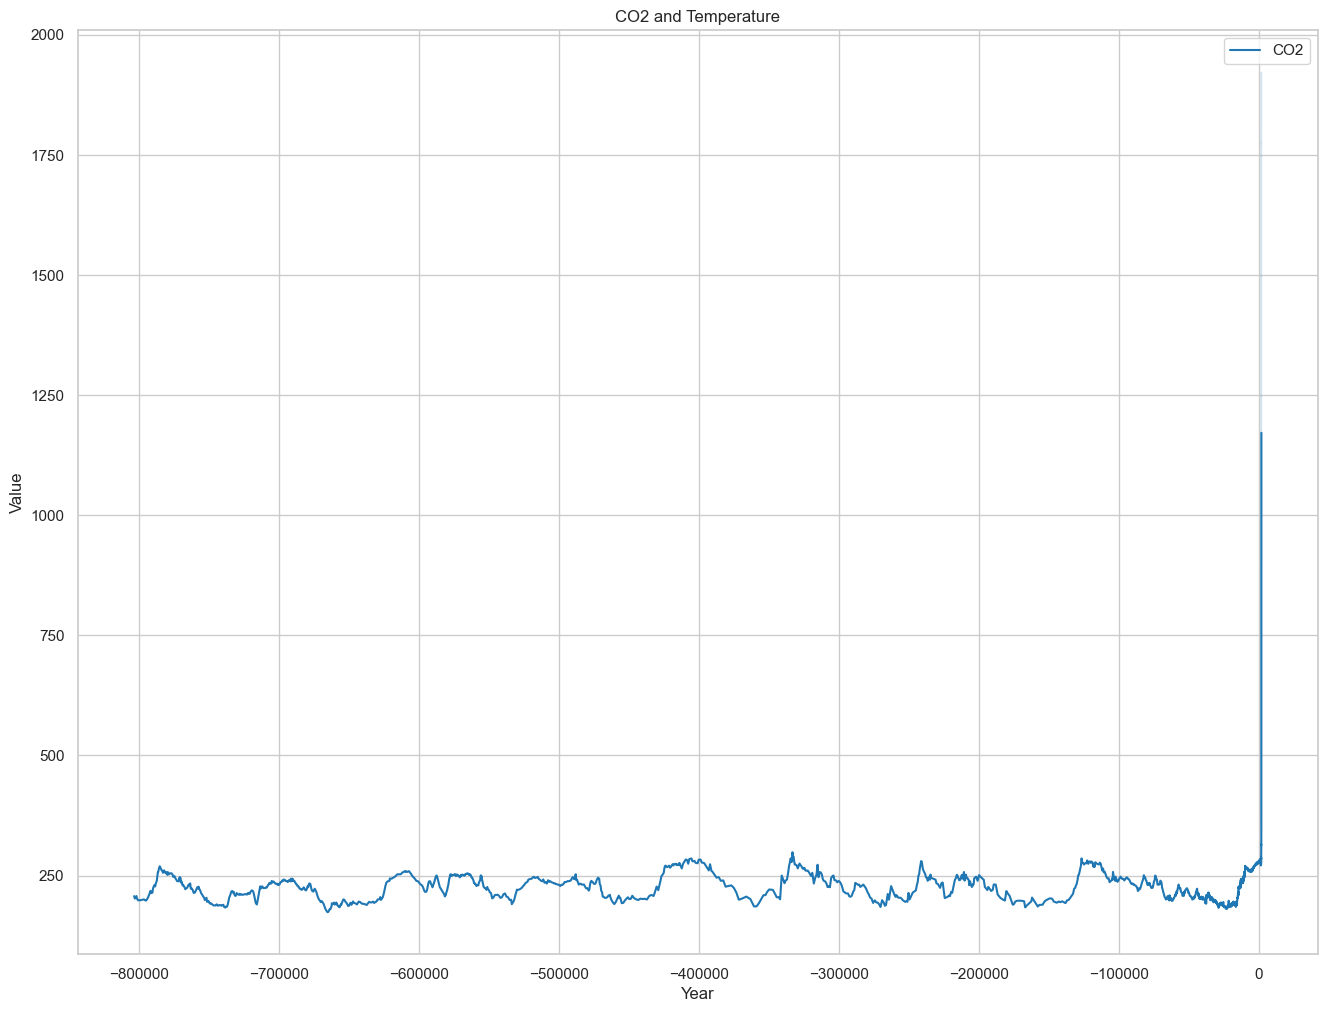

In [1060]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")

plt.title("CO2 and Temperature")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

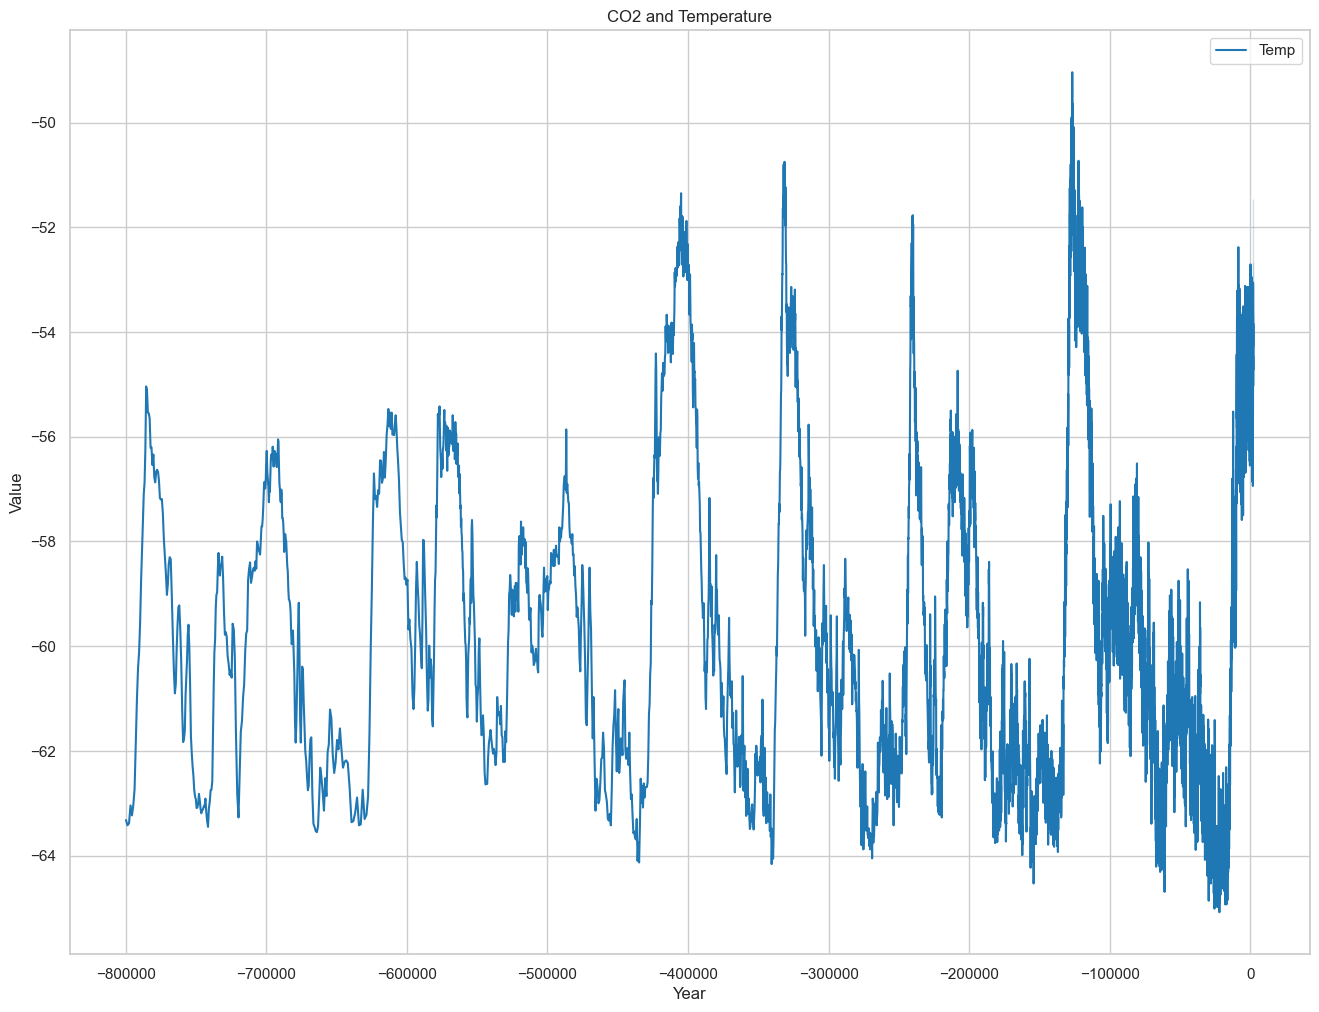

In [1059]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergetemp, x="year", y="temp", label="Temp")

plt.title("CO2 and Temperature")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

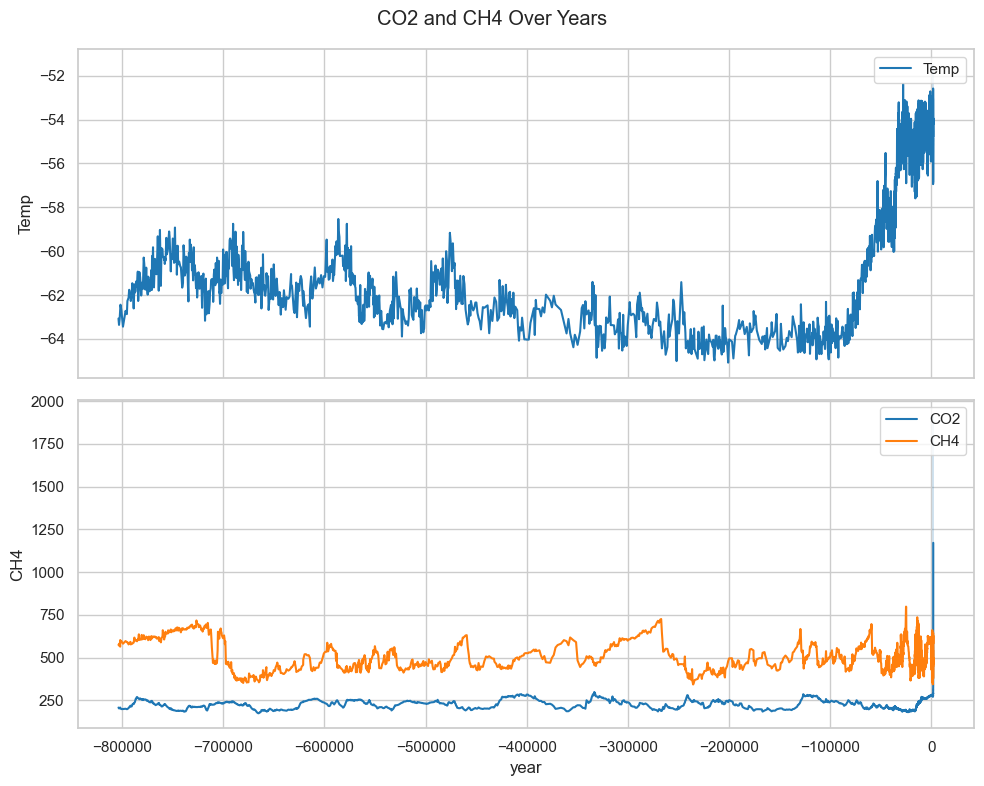

In [1072]:
years = mergeddata["year"]
co2values = mergeddata["co2"]
ch4values = mergech4["ch4"]
tempvalues = mergetemp["temp"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.lineplot(x=years, y=tempvalues, ax=ax1, label="Temp")
sns.lineplot(x=years, y=co2values, ax=ax2, label="CO2")
sns.lineplot(x=years, y=ch4values, ax=ax2, label="CH4")

fig.suptitle("CO2 and CH4 Over Years")
ax1.set_xlabel("Year")

ax1.set_ylabel("Temp")
ax2.set_ylabel("CO2")
ax2.set_ylabel("CH4")

ax1.legend()
ax2.legend()

plt.tight_layout()

plt.show()


---

#### Irish Climate Change

##### Yearly Rainfall 1711 - 2016

In [1075]:
colnames = ["Year", "Month", "Median Rainfall"]
irelandrain = pd.read_csv("DATA Files/IOI_1711_SERIES.CSV", names=colnames, header=0) 
irelandrain.info()
print(irelandrain.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             3672 non-null   int64  
 1   Month            3672 non-null   int64  
 2   Median Rainfall  3672 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 86.2 KB
Index(['Year', 'Month', 'Median Rainfall'], dtype='object')


In [1076]:
irelandrain.tail() #check final year entry

,Year,Month,Median Rainfall
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0
3671,2016,12,92.1


In [1077]:
irelandrain.head()

irelandrain["Median Rainfall"] = irelandrain["Median Rainfall"].astype(float)
uniqueyears = irelandrain["Year"].unique()

totalbyyear = []

for year in uniqueyears:
    
    specificyear = irelandrain[irelandrain["Year"] == year]
    totalmedianyear = specificyear["Median Rainfall"].sum()
    totalbyyear.append({"Year": year, "Total Median": totalmedianyear})

raindfnew = pd.DataFrame(totalbyyear)

raindfnew.to_csv("yearlyrain.csv", index=False)


/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

Text(0, 0.5, 'Median Rainfall (mm)')

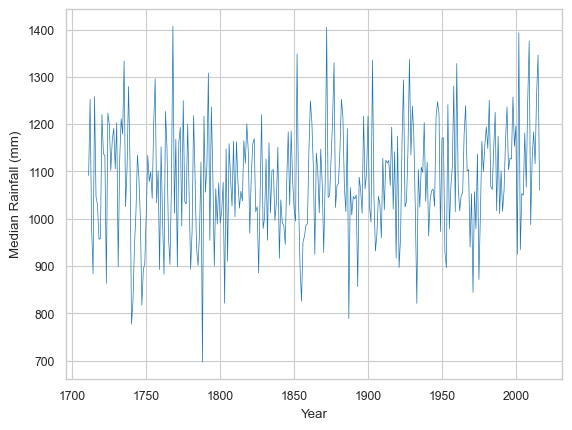

In [1078]:
raindfread = pd.read_csv("yearlyrain.csv")

sns.set_context("paper", rc={"lines.linewidth": 0.5, "figure.figsize":(10, 22)})
plot = sns.lineplot(data=raindfread, x="Year", y="Total Median")
plot.set_xlabel("Year")
plot.set_ylabel("Median Rainfall (mm)")

##### Yearly Temperatures



---


<a id="02i">

## Analysis

</a>

### Trends


### Relationships



---

<a id="03i">

## Predictions

</a>

### Synthetic Data


### Comparisons with Published Climate Models

In [ ]:
#SECTION 3 - PYTHON CELL



---

<a id="04i">

## Further Comments

</a>



In [ ]:
#SECTION 4 - PYTHON CELL



---

<a id="05i">

## Plots

</a>



In [ ]:
#SECTION 5 - PYTHON CELL



---

<a id="07i">

## REFERENCES

</a>


---